In [16]:
# !dir /od "osaka"

 �h���C�u H �̃{�����[�� ���x���� superconducting.qubit@gmail.c... �ł�

�t�@�C����������܂���



 �{�����[�� �V���A���ԍ��� 1983-1116 �ł�

 h:\�}�C�h���C�u\RyoyaOhashi\JPA_tools\JPA_measurement �̃f�B���N�g��



In [2]:
import subprocess
import re
import numpy as np
import matplotlib.pylab as pl
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

In [138]:
# ret=subprocess.run("dir /b osaka",capture_output=True,text=True,shell=True)

# filenames=ret.stdout.split('\n'); filenames.pop(-1);
# print(filenames)

# def get_value_from_filename(x):
#   return float(re.split('(_|[V]\.[c])',x)[6])
# file_info = sorted(zip(filenames,[get_value_from_filename(x) for x in filenames]),key=lambda x:x[1])
# print(file_info)

[]
[]


In [3]:
# 1folder
folder = "20220922_184017_10dB_-0.0--0.2V_8.5-11.0"
filename = "20220922_184017_10dB_0.0V.csv"
file_day = "20220922_184017_10dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

dB = float(df.iat[0, 5])
print(dB)
minV = float(df.iat[1,5])
maxV = float(df.iat[2,5])
numV = int(df.iat[3,5])

v0 = np.linspace(minV, maxV, numV)

if v0[1] > 0:
    v = v0
else:
    v = np.flip(v0)

print(minV, maxV, v)


17           8.5
18       8.50125
19        8.5025
20       8.50375
21         8.505
          ...   
2013      10.995
2014    10.99625
2015     10.9975
2016    10.99875
2017          11
Name: 1, Length: 2001, dtype: object 17    8.5
Name: 1, dtype: object 2017    11
Name: 1, dtype: object
10.0
0.0 -0.2 [-0.2   -0.196 -0.192 -0.188 -0.184 -0.18  -0.176 -0.172 -0.168 -0.164
 -0.16  -0.156 -0.152 -0.148 -0.144 -0.14  -0.136 -0.132 -0.128 -0.124
 -0.12  -0.116 -0.112 -0.108 -0.104 -0.1   -0.096 -0.092 -0.088 -0.084
 -0.08  -0.076 -0.072 -0.068 -0.064 -0.06  -0.056 -0.052 -0.048 -0.044
 -0.04  -0.036 -0.032 -0.028 -0.024 -0.02  -0.016 -0.012 -0.008 -0.004
  0.   ]


In [11]:
v_2001 = np.zeros(len(all_freq))
print(v_2001[1])

0.0


In [16]:
vault = np.array([])
v_2001 = np.zeros(len(all_freq))
for m,n in enumerate(v):
    # print(m,n)
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename
    dat = np.loadtxt(csvname1, skiprows=17, delimiter=',', unpack=True, usecols=[0,1,2,3])
    # phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
    
    # print(dat[:,0])
    # dat[0,:] = v[m]
    
    for n in range(len(all_freq)):
        v_2001[n] = v[m]
        # print(n)
    # print(v_2001)
    
    dat[0,:] = v_2001
    r,c = dat.shape
    # print(dat[0,:])

    
    # print(dat.ravel())
    # vault = np.vstack((vault,dat)) if vault.size > 0 else dat.ravel()
    vault = np.vstack((vault,dat.ravel())) if vault.size > 0 else dat.ravel()
    
    # print(vault)
# vault=vault.reshape((r,c,vault.shape[0]))
vault=vault.reshape((vault.shape[0],r,c))
print(vault.shape[0],r,c)
# print(vault[:,:,1])
print(vault)
# np.savetxt("vault[0]", vault[0], delimiter=",")
# np.savetxt("dat", dat, delimiter=",")



f0 = open('out.csv', 'w')
data = vault[:,0,:],vault[:,1,:],vault[:,2,:],vault[:,3,:]
# data = vault[:,:,0],vault[:,:,1],vault[:,:,2],vault[:,:,3]
writer = csv.writer(f0)
writer.writerow(data)
f0.close()
# print(vault[:,:,0],vault[:,:,1])


51 4 2001
[[[-2.000000e-01 -2.000000e-01 -2.000000e-01 ... -2.000000e-01
   -2.000000e-01 -2.000000e-01]
  [ 8.500000e+00  8.501250e+00  8.502500e+00 ...  1.099750e+01
    1.099875e+01  1.100000e+01]
  [-4.030000e+01 -4.030000e+01 -4.030000e+01 ... -4.290000e+01
   -4.300000e+01 -4.300000e+01]
  [-4.419711e+01 -4.385645e+01 -4.339781e+01 ...  1.445060e+02
    1.456873e+02  1.455818e+02]]

 [[-1.960000e-01 -1.960000e-01 -1.960000e-01 ... -1.960000e-01
   -1.960000e-01 -1.960000e-01]
  [ 8.500000e+00  8.501250e+00  8.502500e+00 ...  1.099750e+01
    1.099875e+01  1.100000e+01]
  [-4.027480e+01 -4.026789e+01 -4.027254e+01 ... -4.294326e+01
   -4.299564e+01 -4.305457e+01]
  [-4.421075e+01 -4.389914e+01 -4.350627e+01 ...  1.434301e+02
    1.440372e+02  1.455555e+02]]

 [[-1.920000e-01 -1.920000e-01 -1.920000e-01 ... -1.920000e-01
   -1.920000e-01 -1.920000e-01]
  [ 8.500000e+00  8.501250e+00  8.502500e+00 ...  1.099750e+01
    1.099875e+01  1.100000e+01]
  [-4.029901e+01 -4.026411e+01 -4.02

In [140]:
# vault = np.array([])
# for filename,value in file_info:
#   print(filename,value,1)
#   dat=np.loadtxt('osaka/'+filename,delimiter=',',skiprows=17,usecols=[0,1,2,3])
#   dat[:,0]=value
#   print(dat[:,0])
#   r,c = dat.shape; 
#   # r, c = dat.shape;
#   print(r,c) 
#   vault = np.vstack((vault,dat.ravel())) if vault.size > 0 else dat.ravel()
# vault=vault.reshape((vault.shape[0],r,c))

In [5]:
# vault[:,2,:]
# re0=np.power(10,vault[:,:,2]/20)*np.cos(np.pi*vault[:,:,3]/180)
# im0=np.power(10,vault[:,:,2]/20)*np.sin(np.pi*vault[:,:,3]/180)
# vault[:,:,2]=re0.copy()
# vault[:,:,3]=im0.copy()

# f1 = open('outRe.csv', 'w')
# data = vault[:,:,2],vault[:,:,3]
# writer = csv.writer(f1)
# writer.writerow(data)
# f1.close()

# # print(vault[:,:,2])
# # print(vault[:,:,3])

phase plot

C:\Users\handa\AppData\Local\Temp\ipykernel_37088\3611142645.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pl.pcolor(vault[:,:,0],vault[:,:,1],np.angle(-(vault[:,:,2]+1j*vault[:,:,3])))


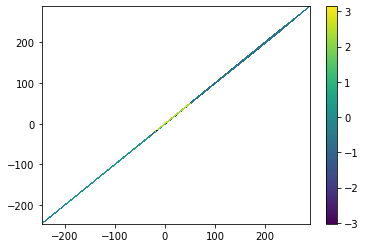

In [26]:
# #　位相評価
# import matplotlib.pyplot as pl
# pl.pcolor(vault[:,:,0],vault[:,:,1],np.angle(-(vault[:,:,2]+1j*vault[:,:,3])))
# # pl.pcolor(vault[:,:,0],vault[:,:,1],np.angle(-(vault[:,:,2]+1j*vault[:,:,3])))
# pl.colorbar()

In [14]:
# vault[:,2,:]
re0=np.power(10,vault[:,2,:]/20)*np.cos(np.pi*vault[:,3,:]/180)
im0=np.power(10,vault[:,2,:]/20)*np.sin(np.pi*vault[:,3,:]/180)
vault[:,2,:]=re0.copy()
vault[:,3,:]=im0.copy()

f1 = open('outRe.csv', 'w')
data = vault[:,2,:],vault[:,3,:]
writer = csv.writer(f1)
writer.writerow(data)
f1.close()
# print(vault[:,:,3])

In [8]:
a=np.angle(-(vault[:,2,:]+1j*vault[:,3,:]))
print(a,a.shape)

[[ 2.37020756  2.3761532  -3.14150656 ... -0.61948716 -0.59886959
  -0.60071091]
 [ 2.3699695   2.37540812 -3.14150765 ... -0.63826516 -0.62766927
  -0.60116993]
 [ 2.36613082  2.37500966 -3.14150803 ... -0.62778097 -0.61242905
  -0.59316411]
 ...
 [ 2.36060302  2.37034457 -3.14151107 ... -0.62087819 -0.61193687
  -0.58241637]
 [ 2.37039903  2.37582054 -3.14150933 ... -0.59398441 -0.59630919
  -0.57227775]
 [ 2.36989899  2.3756687  -3.14150897 ... -0.61129459 -0.58958967
  -0.57454494]] (51, 2001)


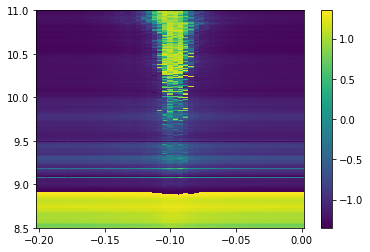

In [20]:
#　位相評価
import matplotlib.pyplot as pl
pl.pcolor(vault[:,0,:],vault[:,1,:],np.angle(-(vault[:,2,:]+1j*vault[:,3,:])))
pl.colorbar()

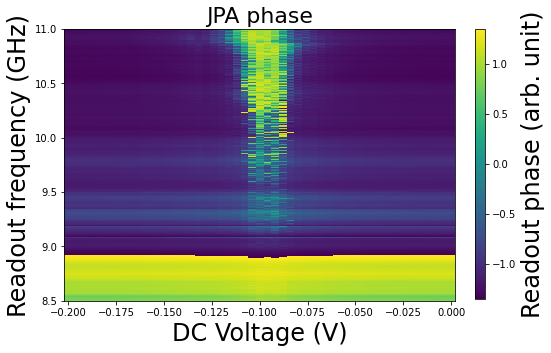

In [26]:
#　位相評価
import matplotlib.pyplot as pl
fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],  np.angle(-(vault[:,2,:]+1j*vault[:,3,:])))
# hoge00.set_clim(-3.14,3.14)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル


pl.show()
del pl

d(theta)/d(current) obtained through the numerical derivation using gauss convolution

[-1.83058100e-12 -1.49876186e-10 -8.23428528e-09 -3.03045680e-07
 -7.45330634e-06 -1.22096760e-04 -1.32573946e-03 -9.46959681e-03
 -4.39369336e-02 -1.29316218e-01 -2.28916681e-01 -2.05644391e-01
  0.00000000e+00  2.05644391e-01  2.28916681e-01  1.29316218e-01
  4.39369336e-02  9.46959681e-03  1.32573946e-03  1.22096760e-04
  7.45330634e-06  3.03045680e-07  8.23428528e-09  1.49876186e-10
  1.83058100e-12] (25,) [6.10193668e-13 5.45004313e-11 3.29371411e-09 1.34686969e-07
 3.72665317e-06 6.97695772e-05 8.83826307e-04 7.57567744e-03
 4.39369336e-02 1.72421624e-01 4.57833362e-01 8.22577562e-01
 1.00000000e+00 8.22577562e-01 4.57833362e-01 1.72421624e-01
 4.39369336e-02 7.57567744e-03 8.83826307e-04 6.97695772e-05
 3.72665317e-06 1.34686969e-07 3.29371411e-09 5.45004313e-11
 6.10193668e-13] (25,)


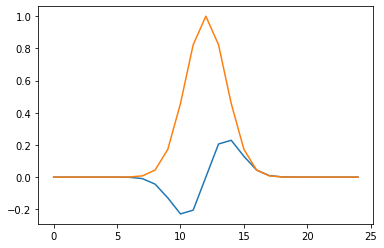

In [32]:
import matplotlib.pyplot as pl
sigma=0.4
x=np.arange(-12,12.1)/4;
g=x*np.exp(-x*x/2/sigma**2)
h=np.exp(-x*x/2/sigma**2)
print(g,g.shape,h,h.shape)
pl.plot(g)
pl.plot(h)

In [43]:
#　微分評価, vault[:,2,:]
rdiff=np.array([])
idiff=np.array([])
reg  = np.array([])
img  = np.array([])
# for i in range(r):
for i in range(c):
  _dat=np.convolve(g,vault[:,2,i],'same');  rdiff=np.vstack((rdiff,_dat)) if rdiff.size > 0 else _dat
  _dat=np.convolve(g,vault[:,3,i],'same');  idiff=np.vstack((idiff,_dat)) if idiff.size > 0 else _dat
  _dat=np.convolve(h,vault[:,2,i],'same');  reg=np.vstack((reg,_dat)) if reg.size > 0 else _dat
  _dat=np.convolve(h,vault[:,3,i],'same');  img=np.vstack((img,_dat)) if img.size > 0 else _dat

  # f1 = open('out' + str(i), 'w')
  # data = vault[:,2,i],vault[:,3,i]
  # writer = csv.writer(f1)
  # writer.writerow(data)
  # f1.close()

rdiff=rdiff.T
idiff=idiff.T
reg=reg.T
img=img.T

print(idiff.shape,rdiff.shape)
print(vault[:,2,:].shape)

f2 = open('outnum.csv', 'w')
data = vault[:,2,:],vault[:,3,:]
writer = csv.writer(f2)
writer.writerow(data)
f2.close()

f3 = open('rdiff,idiff.csv', 'w')
data = rdiff,idiff,reg,img
writer = csv.writer(f3)
writer.writerow(data)
f3.close()

(51, 2001) (51, 2001)
(51, 2001)


In [44]:
import matplotlib.pyplot as pl
r2=reg*reg+img*img
diff=(idiff*reg-rdiff*img)/r2
print(diff,diff.shape)

[[-0.00037754 -0.00021906 -0.00029892 ... -0.00018474 -0.00028611
  -0.00012621]
 [-0.00057854 -0.00032351 -0.00041503 ... -0.00025304 -0.00039099
  -0.00031789]
 [-0.00075665 -0.00042747 -0.00053244 ... -0.00043151 -0.00057256
  -0.00065599]
 ...
 [ 0.00094297  0.0006696   0.00056872 ...  0.0007341   0.00066895
   0.00074646]
 [ 0.00086124  0.00049898  0.00042383 ...  0.00049665  0.00044694
   0.00047356]
 [ 0.00062865  0.00034132  0.00028167 ...  0.00025704  0.00028498
   0.0002631 ]] (51, 2001)


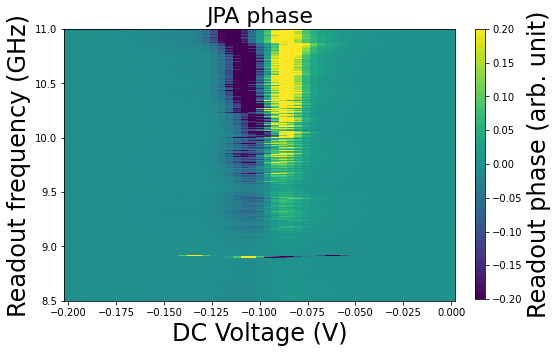

In [46]:
#　微分評価
import matplotlib.pyplot as pl

r2=reg*reg+img*img
diff=(idiff*reg-rdiff*img)/r2

fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],(diff),vmin=-.2,vmax=.2)
# hoge00.set_clim(-3.14,3.14)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル


pl.show()
del pl